Best and Worst MSE:
Best MSE: 1.7754836117783506, Coef: 0.10461418352732463, Intercept: 3.7890598529289194, Test Size: 0.1, Random State: 71.0
Worst MSE: 2.7474443821332244, Coef: 0.10578306391716327, Intercept: 3.7476998677436484, Test Size: 0.1, Random State: 84.0
Best and Worst MAE:
Best MAE: 1.1353822631653276, Coef: 0.10473368781345987, Intercept: 3.774801540436406, Test Size: 0.1, Random State: 99.0
Worst MAE: 1.4359003545824551, Coef: 0.10517099377370616, Intercept: 3.750408082376426, Test Size: 0.1, Random State: 51.0
Best and Worst R²:
Best R²: 0.8466331149896816, Coef: 0.10211961345555952, Intercept: 3.9269911174225856, Test Size: 0.1, Random State: 56.0
Worst R²: 0.6730606274752198, Coef: 0.10535538664814181, Intercept: 3.7297064273893366, Test Size: 0.1, Random State: 42.0


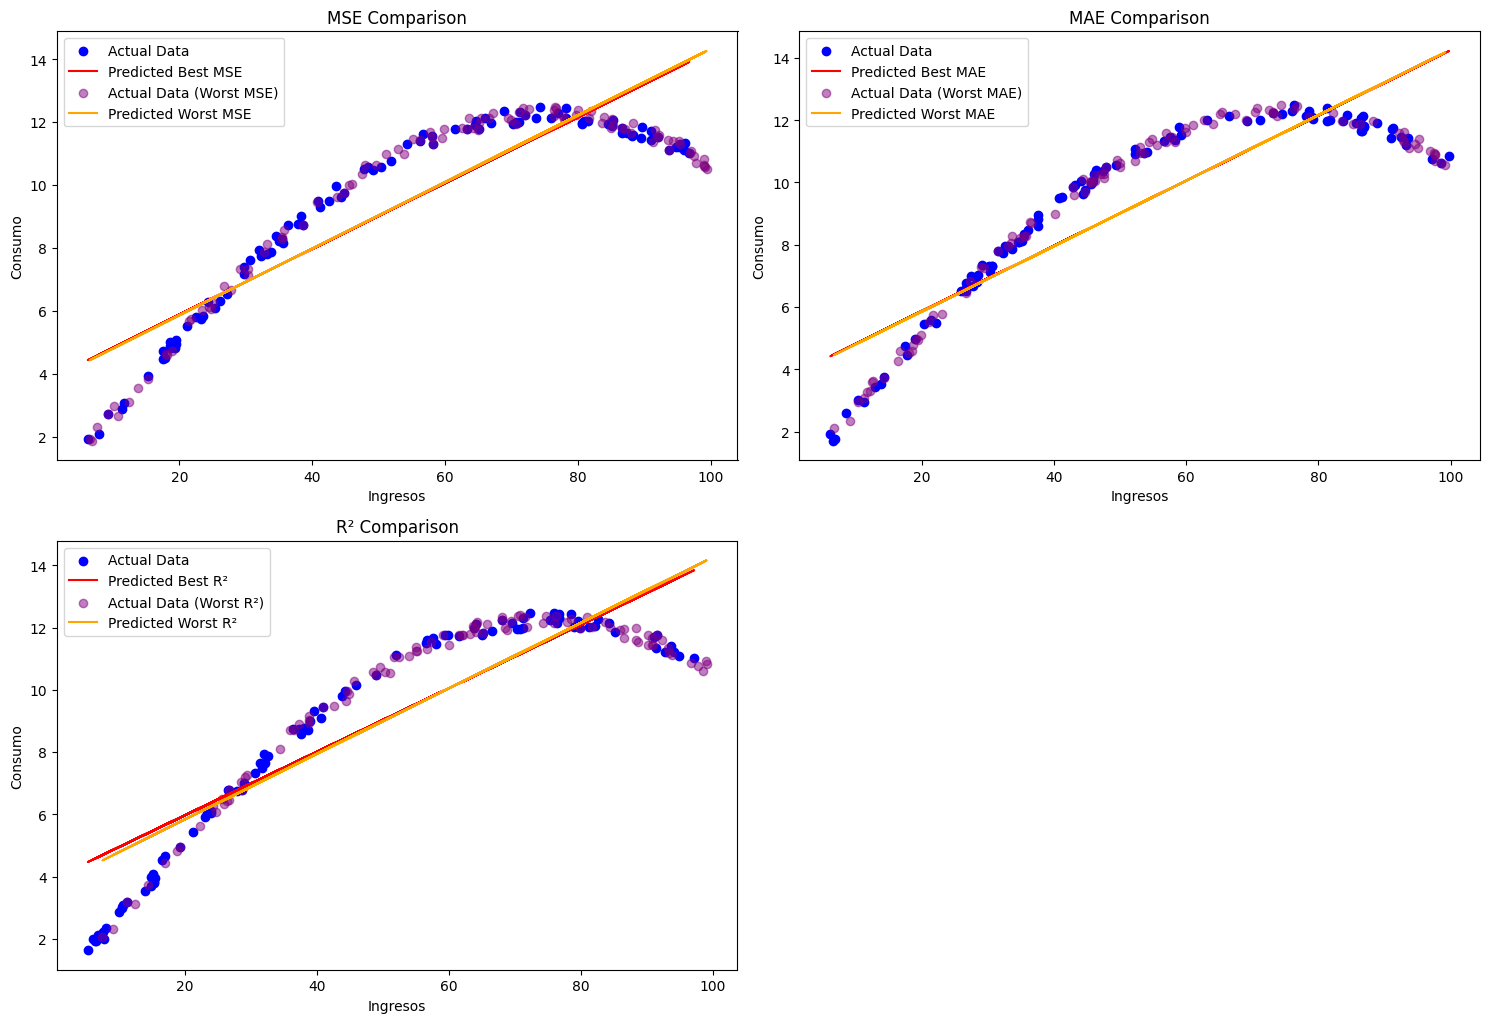

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

data = pd.read_excel('DatosRegresion1D.xlsx')
x = data['ingresos'].values.reshape(-1, 1)
y = data['consumo'].values

test_size_range = np.arange(0.1, 1.0, 0.1)
random_state_range = range(101)
results = []

for test_size in test_size_range:
    for random_state in random_state_range:
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)
        model = LinearRegression().fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results.append({
            'test_size': test_size,
            'random_state': random_state,
            'coef': model.coef_[0],
            'intercept': model.intercept_,
            'mse': mse,
            'mae': mae,
            'r2': r2
        })

df_results = pd.DataFrame(results)

min_mse = df_results.loc[df_results['mse'].idxmin()]
max_mse = df_results.loc[df_results['mse'].idxmax()]
min_mae = df_results.loc[df_results['mae'].idxmin()]
max_mae = df_results.loc[df_results['mae'].idxmax()]
max_r2 = df_results.loc[df_results['r2'].idxmax()]
min_r2 = df_results.loc[df_results['r2'].idxmin()]

print("Best and Worst MSE:")
print(f"Best MSE: {min_mse['mse']}, Coef: {min_mse['coef']}, Intercept: {min_mse['intercept']}, "
      f"Test Size: {min_mse['test_size']}, Random State: {min_mse['random_state']}")
print(f"Worst MSE: {max_mse['mse']}, Coef: {max_mse['coef']}, Intercept: {max_mse['intercept']}, "
      f"Test Size: {max_mse['test_size']}, Random State: {max_mse['random_state']}")
print("Best and Worst MAE:")
print(f"Best MAE: {min_mae['mae']}, Coef: {min_mae['coef']}, Intercept: {min_mae['intercept']}, "
      f"Test Size: {min_mae['test_size']}, Random State: {min_mae['random_state']}")
print(f"Worst MAE: {max_mae['mae']}, Coef: {max_mae['coef']}, Intercept: {max_mae['intercept']}, "
      f"Test Size: {max_mae['test_size']}, Random State: {max_mae['random_state']}")
print("Best and Worst R²:")
print(f"Best R²: {max_r2['r2']}, Coef: {max_r2['coef']}, Intercept: {max_r2['intercept']}, "
      f"Test Size: {max_r2['test_size']}, Random State: {max_r2['random_state']}")
print(f"Worst R²: {min_r2['r2']}, Coef: {min_r2['coef']}, Intercept: {min_r2['intercept']}, "
      f"Test Size: {min_r2['test_size']}, Random State: {min_r2['random_state']}")

def prepare_data(metric_row):
    X_train, X_test, y_train, y_test = train_test_split(
        x, y, test_size=metric_row['test_size'], random_state=int(metric_row['random_state']))
    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return X_test, y_test, y_pred

X_test_mse, y_test_mse, y_pred_mse = prepare_data(min_mse)
X_test_max_mse, y_test_max_mse, y_pred_max_mse = prepare_data(max_mse)
X_test_mae, y_test_mae, y_pred_mae = prepare_data(min_mae)
X_test_max_mae, y_test_max_mae, y_pred_max_mae = prepare_data(max_mae)
X_test_r2, y_test_r2, y_pred_r2 = prepare_data(max_r2)
X_test_min_r2, y_test_min_r2, y_pred_min_r2 = prepare_data(min_r2)

plt.figure(figsize=(15, 15))

plt.subplot(3, 2, 1)
plt.scatter(X_test_mse, y_test_mse, color='blue', label='Actual Data')
plt.plot(X_test_mse, y_pred_mse, color='red', label='Predicted Best MSE')
plt.scatter(X_test_max_mse, y_test_max_mse, color='purple', label='Actual Data (Worst MSE)', alpha=0.5)
plt.plot(X_test_max_mse, y_pred_max_mse, color='orange', label='Predicted Worst MSE')
plt.title('MSE Comparison')
plt.xlabel('Ingresos')
plt.ylabel('Consumo')
plt.legend()

plt.subplot(3, 2, 2)
plt.scatter(X_test_mae, y_test_mae, color='blue', label='Actual Data')
plt.plot(X_test_mae, y_pred_mae, color='red', label='Predicted Best MAE')
plt.scatter(X_test_max_mae, y_test_max_mae, color='purple', label='Actual Data (Worst MAE)', alpha=0.5)
plt.plot(X_test_max_mae, y_pred_max_mae, color='orange', label='Predicted Worst MAE')
plt.title('MAE Comparison')
plt.xlabel('Ingresos')
plt.ylabel('Consumo')
plt.legend()

plt.subplot(3, 2, 3)
plt.scatter(X_test_r2, y_test_r2, color='blue', label='Actual Data')
plt.plot(X_test_r2, y_pred_r2, color='red', label='Predicted Best R²')
plt.scatter(X_test_min_r2, y_test_min_r2, color='purple', label='Actual Data (Worst R²)', alpha=0.5)
plt.plot(X_test_min_r2, y_pred_min_r2, color='orange', label='Predicted Worst R²')
plt.title('R² Comparison')
plt.xlabel('Ingresos')
plt.ylabel('Consumo')
plt.legend()

plt.tight_layout()
plt.show()